# 概述
使用pdpbox工具包，对随机森林分类模型，进行可解释性分析。绘制PDP图、ICE图、双变量PDP图，可以直观看出每个特征的不同值对模型预测结果的影响，以及特征交互对模型预测结果的影响

### PDP = Partial Dependent Plot 部分依赖图
部分依赖图简称PDP，能够展现出一个或两个特征变量对模型预测结果影响的函数关系：近似线性关系、单调关系或者更复杂的关系。

- 优点
1. 易于实施

- 缺点
1. 不能反映特征变量本身的分布情况，且拥有苛刻的假设条件——变量之间严格独立。若变量之间存在相关关系，会导致计算过程中产生过多的无效样本，估计出的值比实际偏高。
2. 样本整体的非均匀效应（Heterogeneous effect）：PDP只能反映特征变量的平均水平，忽视了数据异质对结果产生的影响。

### ICE = Individual Conditional Expectation 个体条件期望图
个体条件期望图简称ICE，计算方法与PDP类似，它刻画的是每个个体的预测值与单一变量之间的关系。个体条件期望图消除了非均匀效应的影响，它的原理和实现方法如下：对某一个体，保持其他变量不变，随机置换我们选定的特征变量的取值，放入黑箱模型输出预测结果，最后绘制出针对这个个体的单一特征变量与预测值之间的关系图。相较于PDP的一概而论，ICE图能够更准确地反映特征变量与目标之间的关系

- 优点
1. 易于理解，能够避免数据异质的问题。在ICE图提出之后，人们又提出了衍生ICE图，能够进一步检测变量之间的交互关系并在ICE图中反映出来。

- 缺点
1. 只能反映单一特征变量与目标之间的关系，仍然受制于变量独立假设的要求，同时ICE图像往往由于个体过多导致图像看起来过于冗杂，不容易获取解释信息。

## 导入工具包，导入数据集

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("./data/process_heart.csv")

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = RandomForestClassifier(max_depth=5, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

base_feature_names = X.columns.tolist()
base_feature_names

['age',
 'resting_blood_pressure',
 'cholestrerol',
 'max_heart_rate_achieved',
 'st_depression',
 'num_major_vessels',
 'sex_female',
 'sex_male',
 'chest_pain_type_asymptomatic',
 'chest_pain_type_atypical angina',
 'chest_pain_type_non-anginal pain',
 'chest_pain_type_typical angina',
 'fasting_blood_sugar_greater than 120 mg/ml',
 'fasting_blood_sugar_lower than 120 mg/ml',
 'rest_ecg_ST-T wave abnormality',
 'rest_ecg_left ventricular hypertrophy',
 'rest_ecg_normal',
 'exercise_induced_angina_no',
 'exercise_induced_angina_yes',
 'st_slope_downsloping',
 'st_slope_flat',
 'st_slope_upsloping',
 'thalassemia_fixed defect',
 'thalassemia_normal',
 'thalassemia_reversable defect',
 'thalassemia_unknown']

## 导入PDPBOX工具包

In [12]:
from pdpbox import info_plots, pdp

## 绘制PDP图
反映某一特征在不同值变化时对模型的预测结果的影响。注意对比PDP图和先验数据集不同类别分布的差异
### 性别

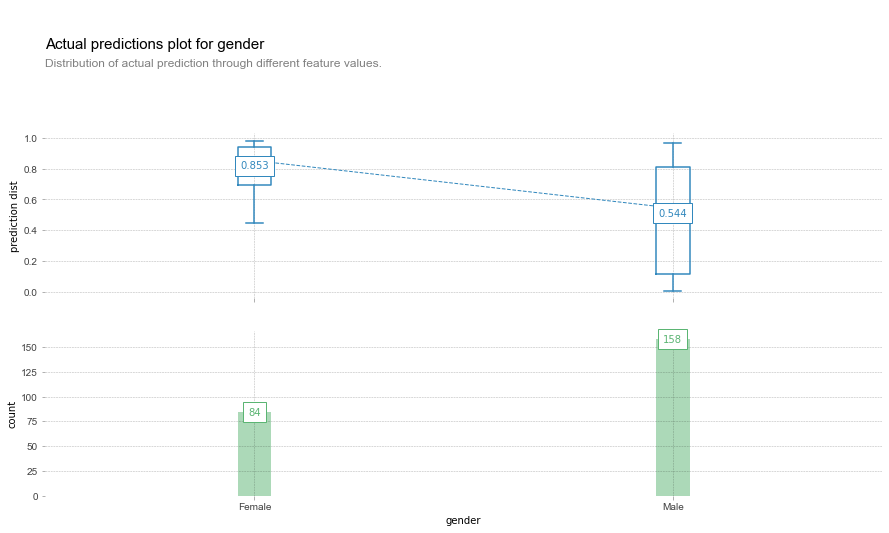

In [13]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature="sex_male", feature_name="gender", predict_kwds={}
)
_ = axes["bar_ax"].set_xticklabels(["Female", "Male"])

原始数据集中，性别特征统计分布（先验分布），及患心脏病和不患心脏病类别分布图

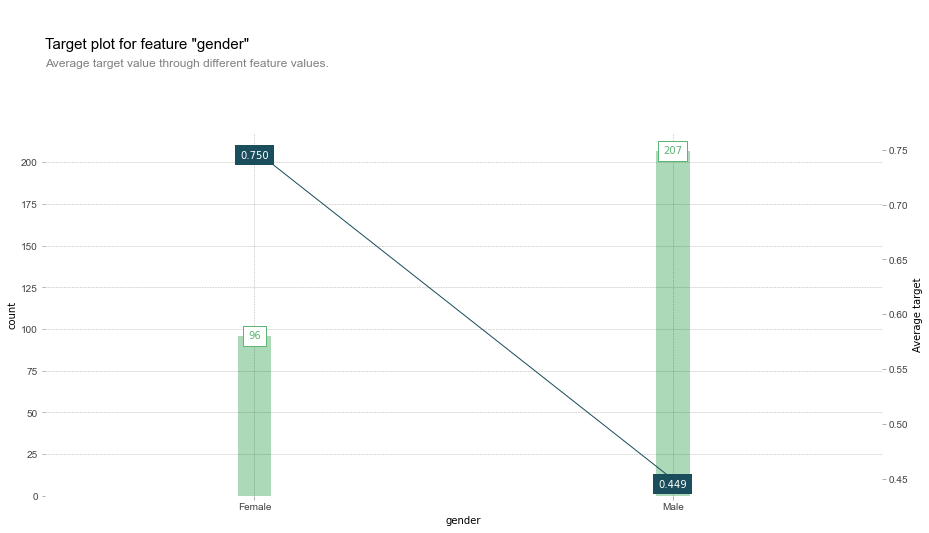

In [14]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature="sex_male", feature_name="gender", target=["target"]
)
_ = axes["bar_ax"].set_xticklabels(["Female", "Male"])

### 心脏周围大血管数

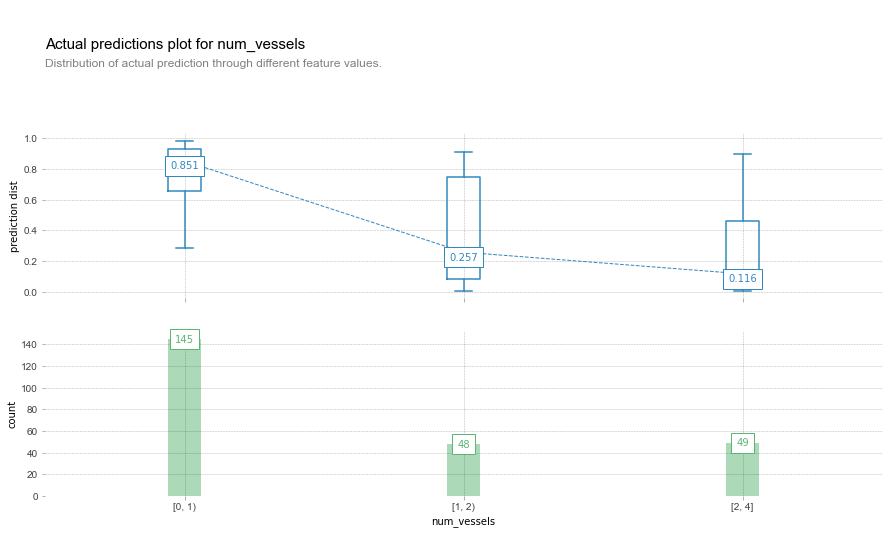

In [15]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature="num_major_vessels", feature_name="num_vessels", predict_kwds={}
)

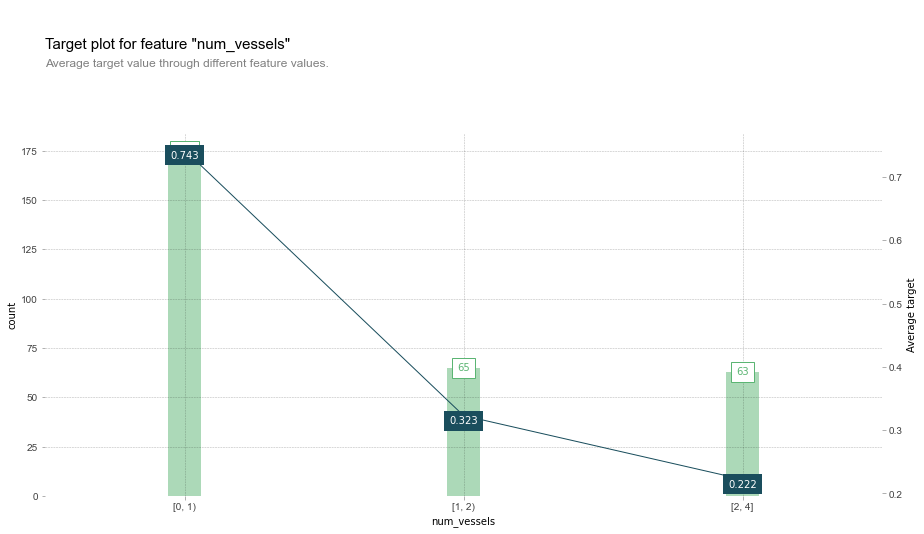

In [16]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature="num_major_vessels", feature_name="num_vessels", target=["target"]
)

### 最大心率

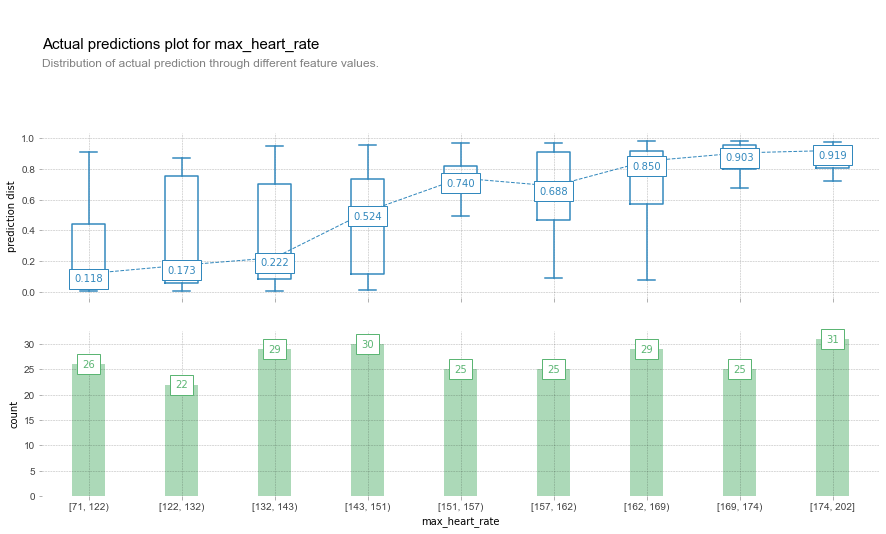

In [17]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature="max_heart_rate_achieved", feature_name="max_heart_rate", predict_kwds={}
)

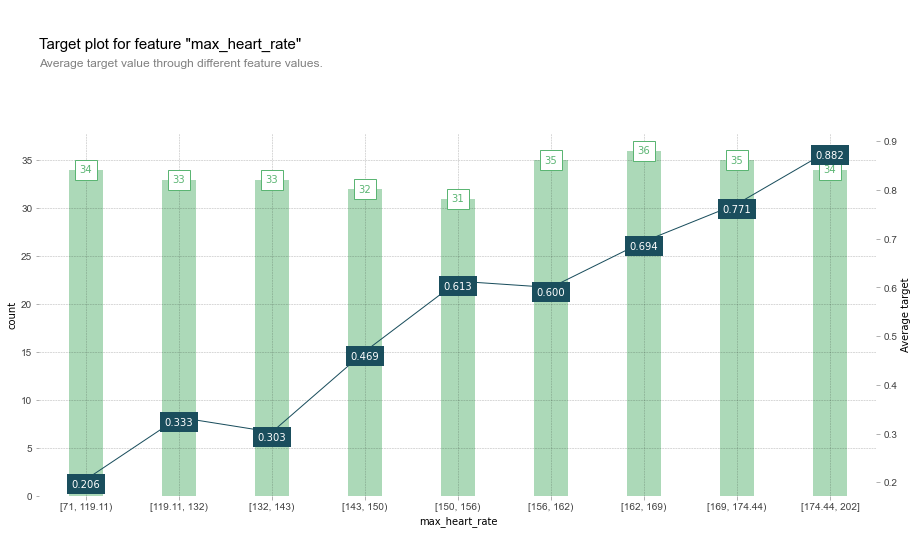

In [18]:
fig, axes, summary_df = info_plots.target_plot(
    df=df, feature="max_heart_rate_achieved", feature_name="max_heart_rate", target=["target"]
)

## 绘制ICE图
将测试集每一个样本的PDP图单独显示出来，即是ICE图
### 性别

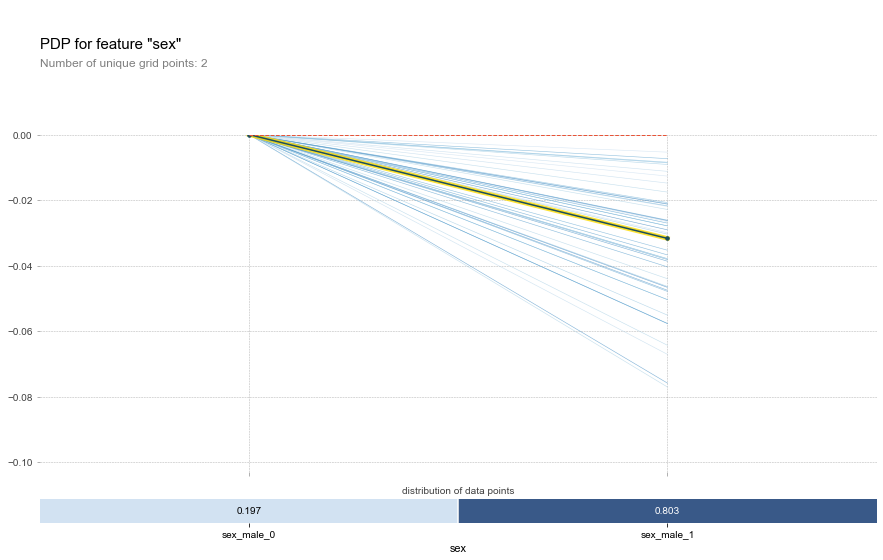

In [19]:
feature_name = "sex_male"
nick_name = "sex"
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_feature_names, feature=feature_name
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

### 心脏周围大血管数量

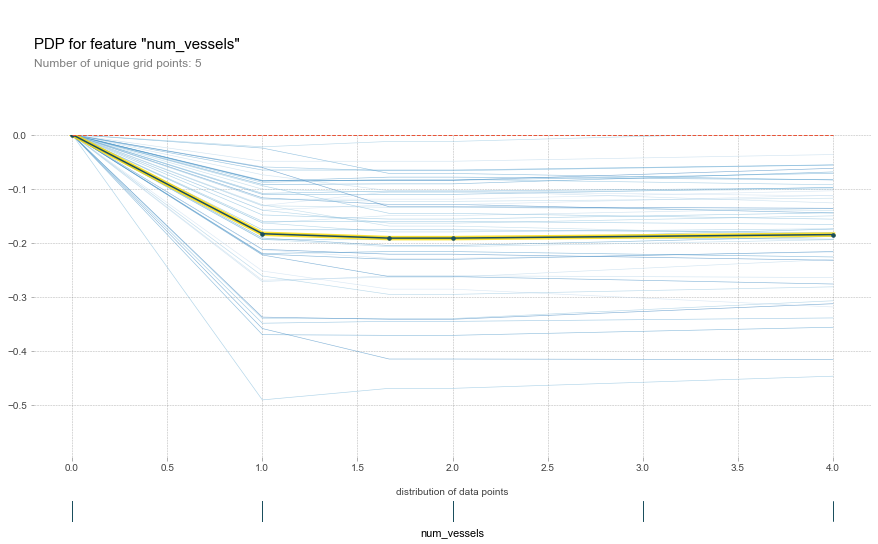

In [20]:
feature_name = "num_major_vessels"
nick_name = "num_vessels"
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_feature_names, feature=feature_name
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

### 年龄

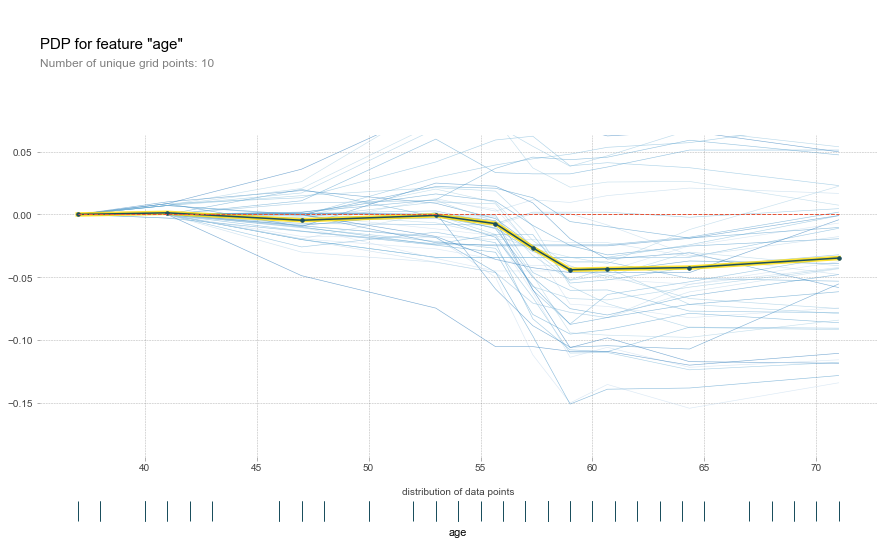

In [21]:
feature_name = "age"
nick_name = "age"
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_feature_names, feature=feature_name
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

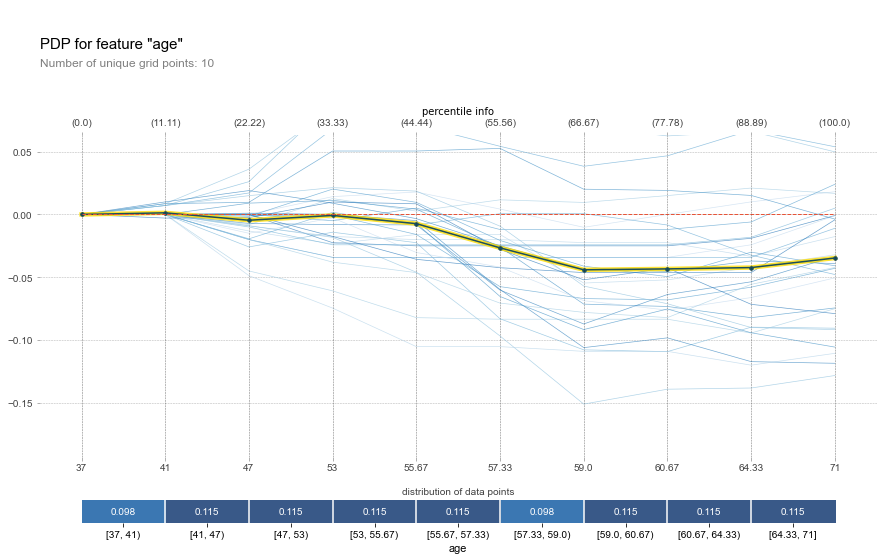

In [22]:
fig, axes = pdp.pdp_plot(
    pdp_dist, nick_name, 
    plot_lines=True, 
    frac_to_plot=0.5, 
    plot_pts_dist=True, 
    show_percentile=True, 
    x_quantile=True)

## 理解最大心率对预测结果的影响
### 先验分布

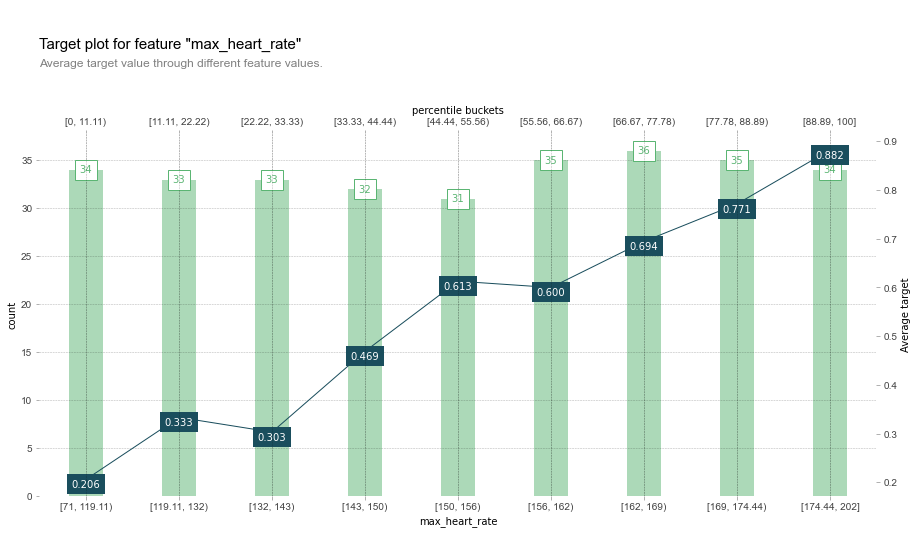

In [23]:
feature_name = "max_heart_rate_achieved"
nick_name = "max_heart_rate"

fig, axes, summary_df = info_plots.target_plot(
    df=df, feature=feature_name, feature_name=nick_name, target=["target"], show_percentile=True
)

### 考虑了模型，具有因果性，可比较模型预测结果与先验的趋势

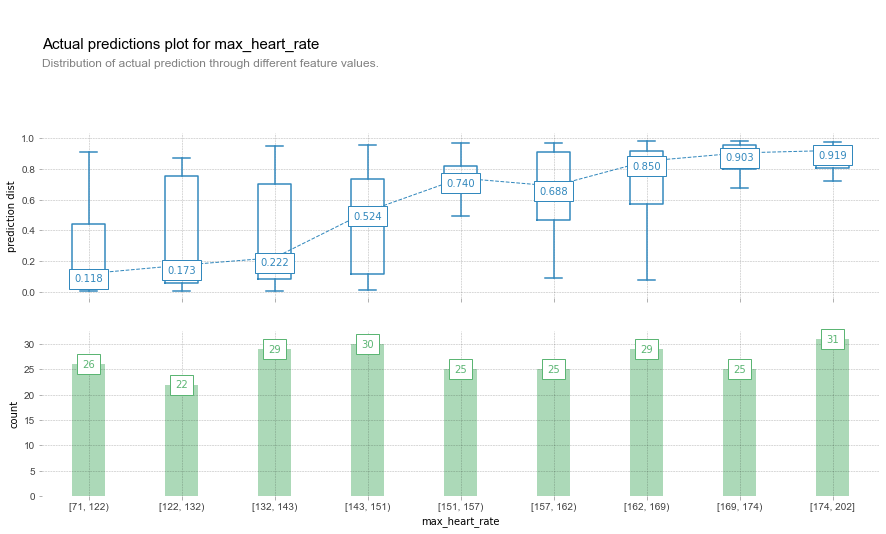

In [24]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature=feature_name, feature_name=nick_name, predict_kwds={}
)

### PDP图

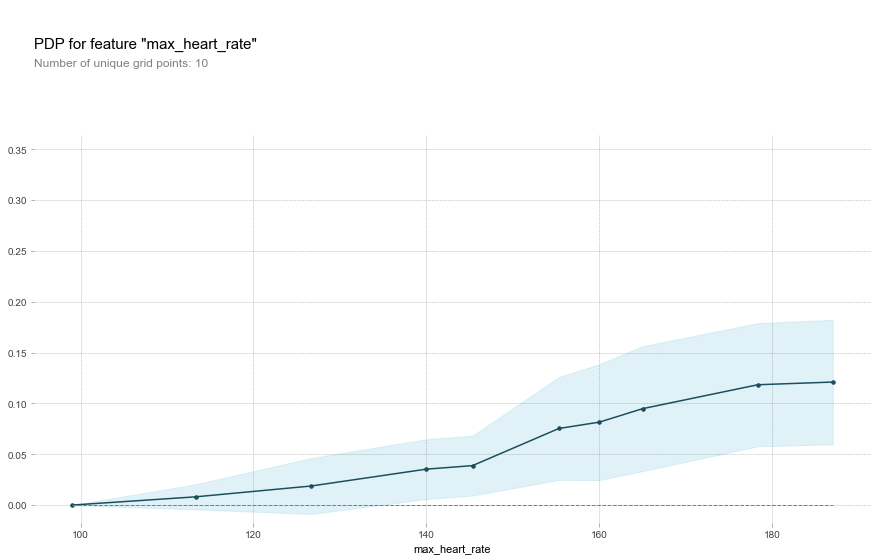

In [25]:
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_feature_names, feature=feature_name
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name)

### ICE图

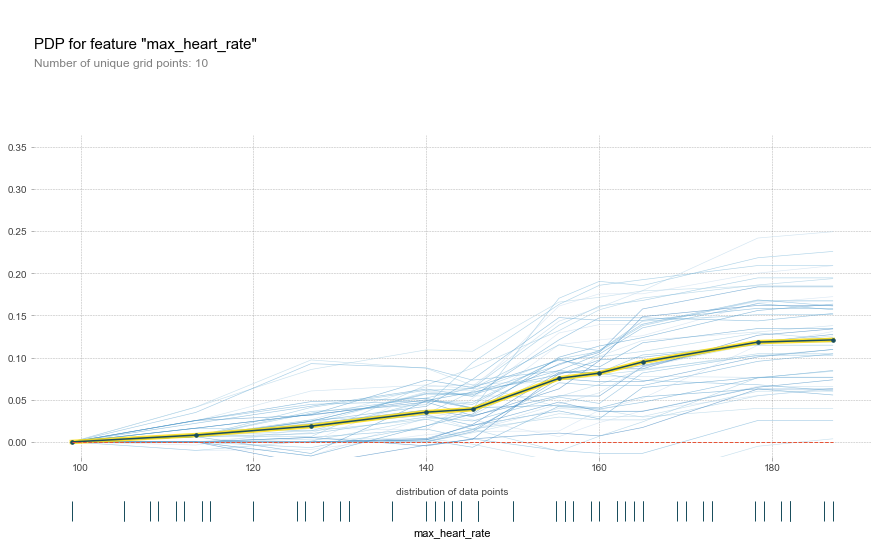

In [26]:
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_feature_names, feature=feature_name
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

## 深入理解地中海贫血症对预测结果的影响
注意：地中海贫血症是OneHotEncoding
### 先验分布

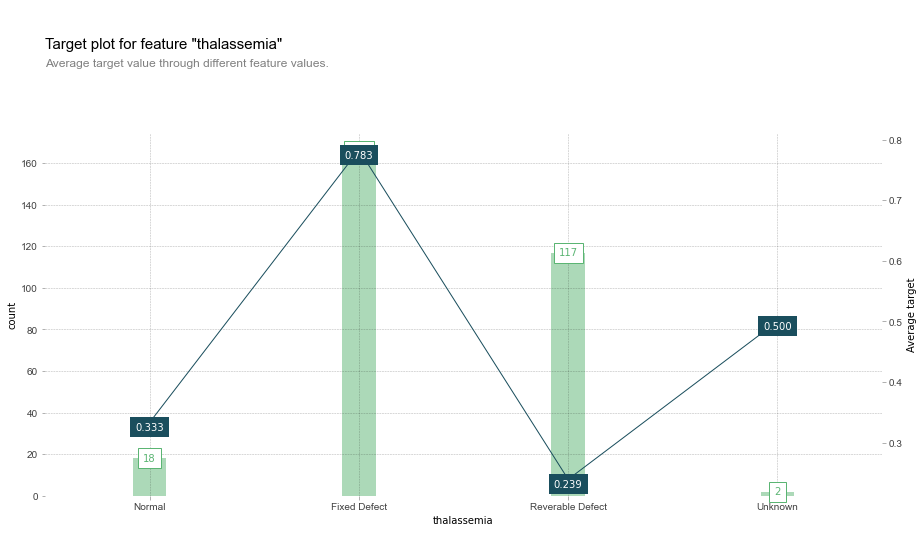

In [27]:
feature_names = [
    'thalassemia_normal',
    'thalassemia_fixed defect',
    'thalassemia_reversable defect',
    'thalassemia_unknown'
]
nick_name = "thalassemia"

fig, axes, summary_df = info_plots.target_plot(
    df=df, feature=feature_names, feature_name=nick_name, target=["target"], show_percentile=True
)
_ = axes["bar_ax"].set_xticklabels(["Normal", "Fixed Defect", "Reverable Defect", "Unknown"])

### 考虑模型，预测分布

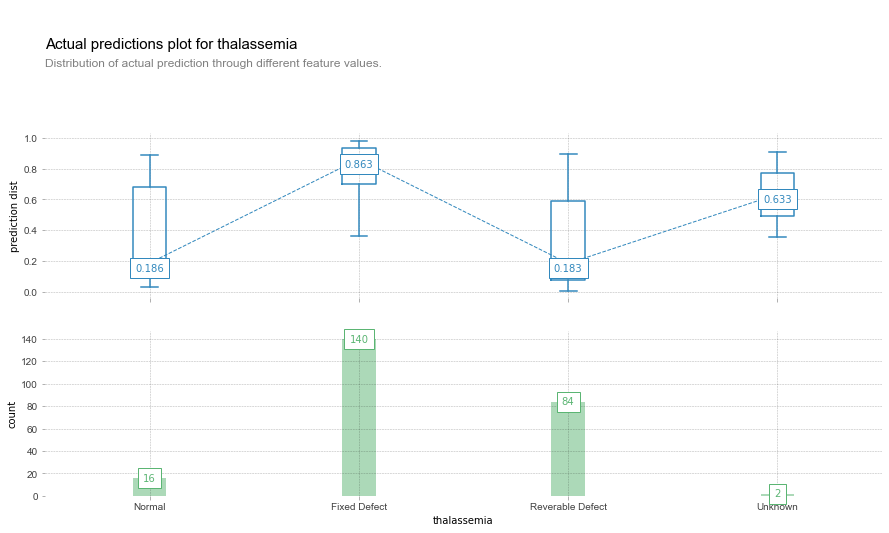

In [28]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, X=X_train, feature=feature_names, feature_name=nick_name, predict_kwds={}
)
_ = axes["bar_ax"].set_xticklabels(["Normal", "Fixed Defect", "Reverable Defect", "Unknown"])

### PDP图

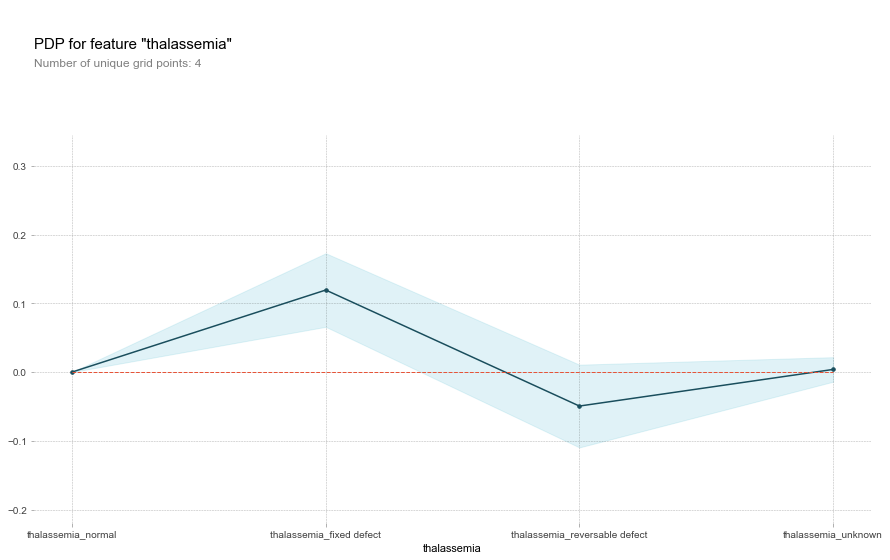

In [29]:
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_feature_names, feature=feature_names
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name)

### ICE图

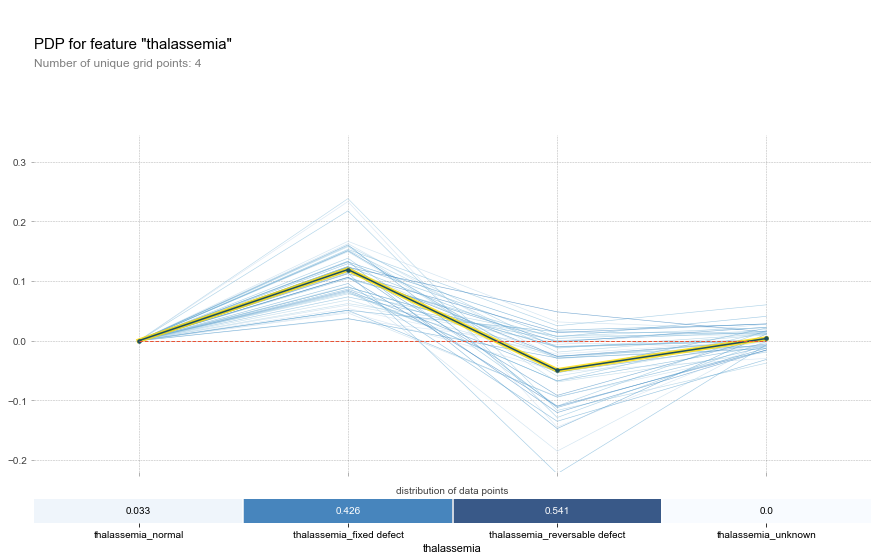

In [30]:
pdp_dist = pdp.pdp_isolate(
    model=model, dataset=X_test, model_features=base_feature_names, feature=feature_names
)
fig, axes = pdp.pdp_plot(pdp_dist, nick_name, plot_lines=True, frac_to_plot=0.8, plot_pts_dist=True)

## PDP图合集，绘制所有特征的PDP图

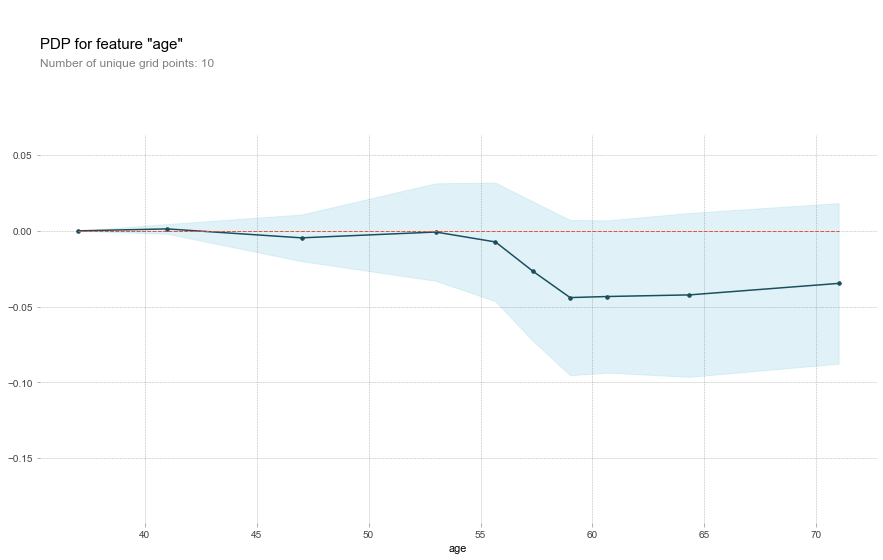

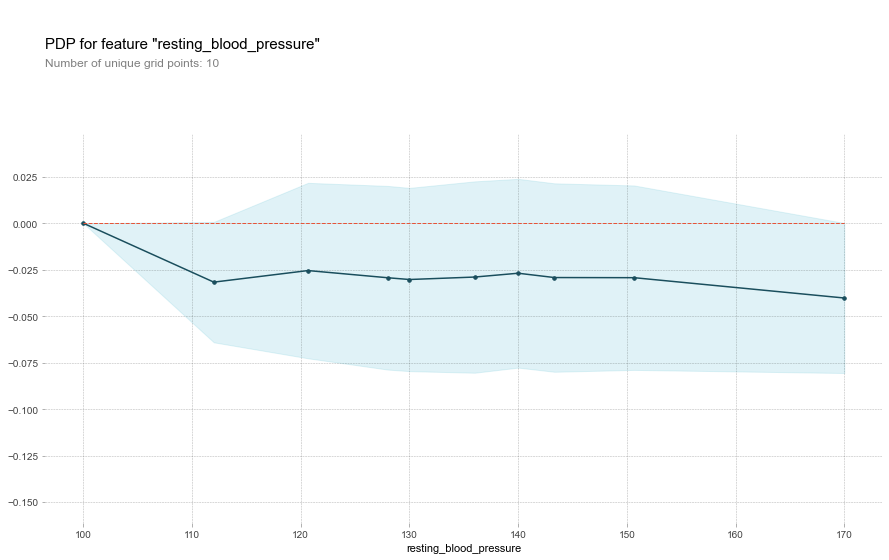

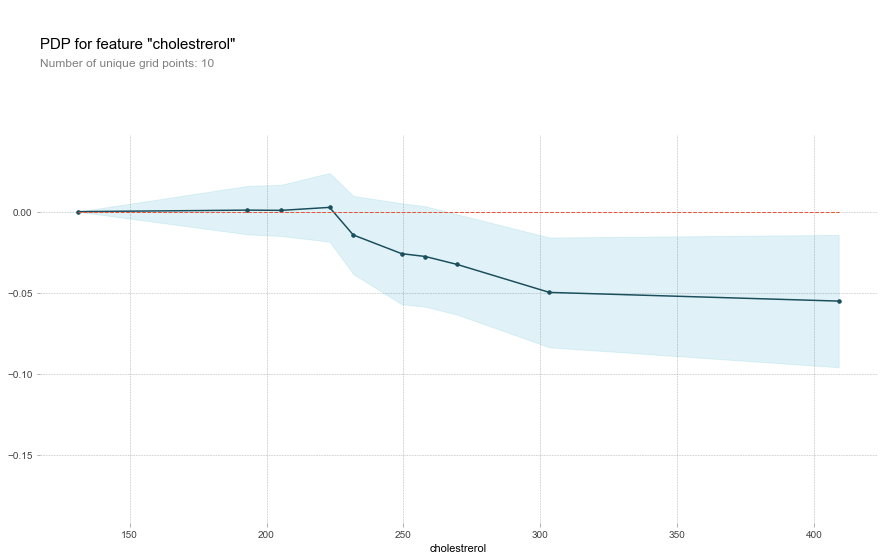

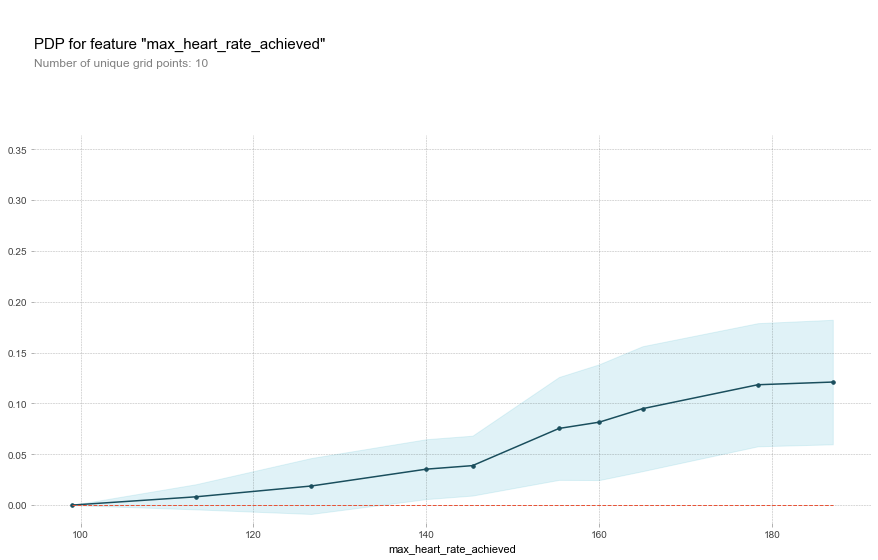

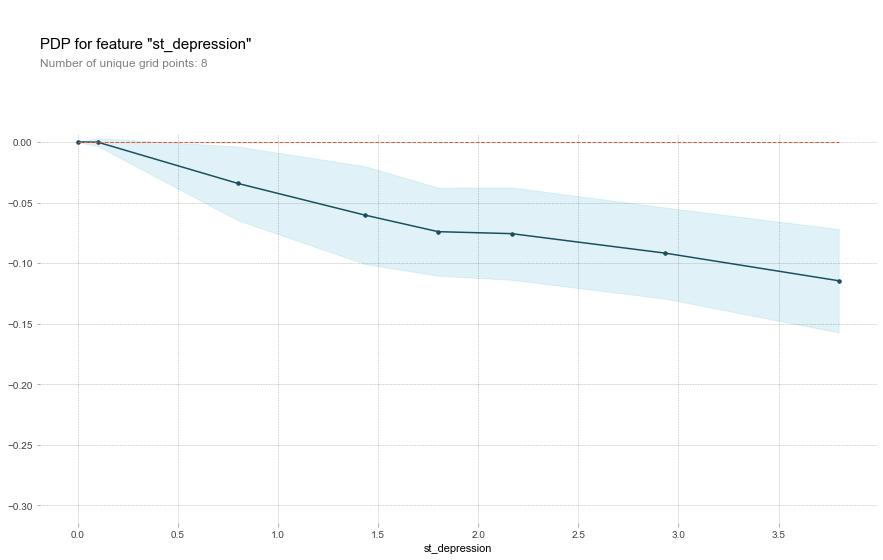

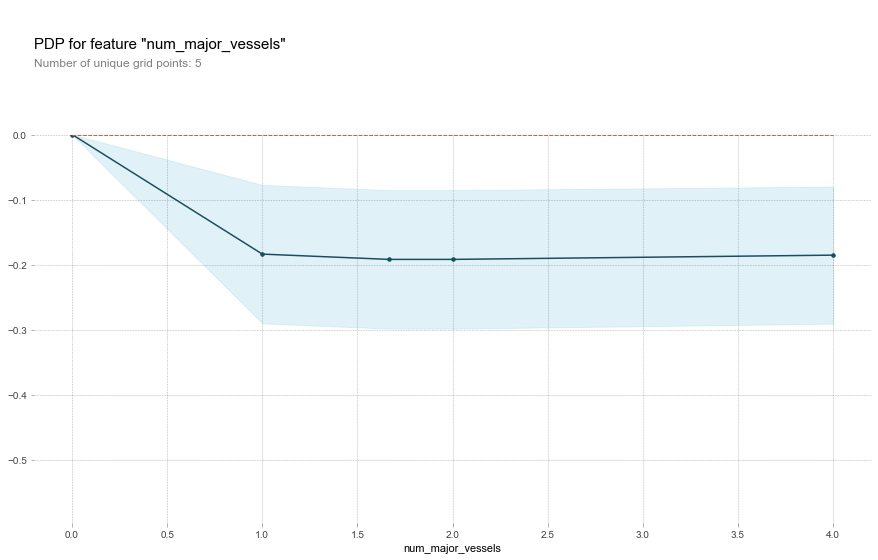

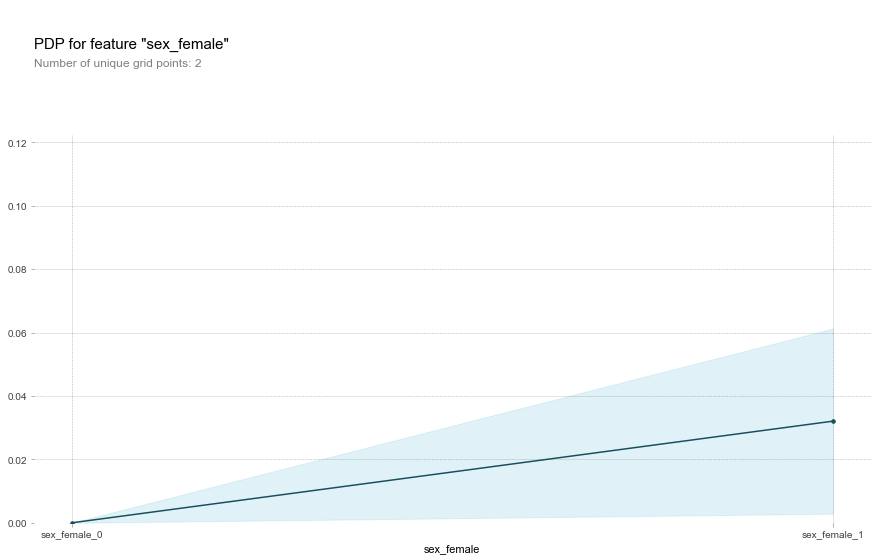

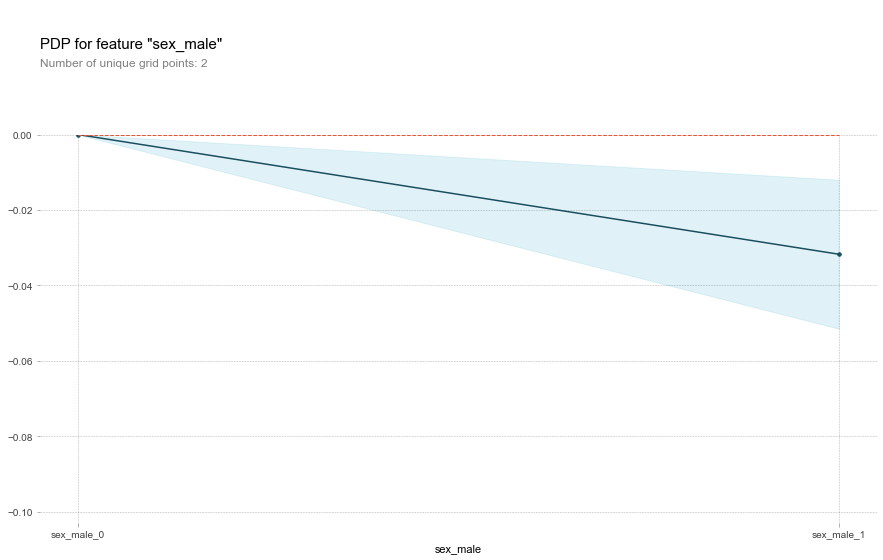

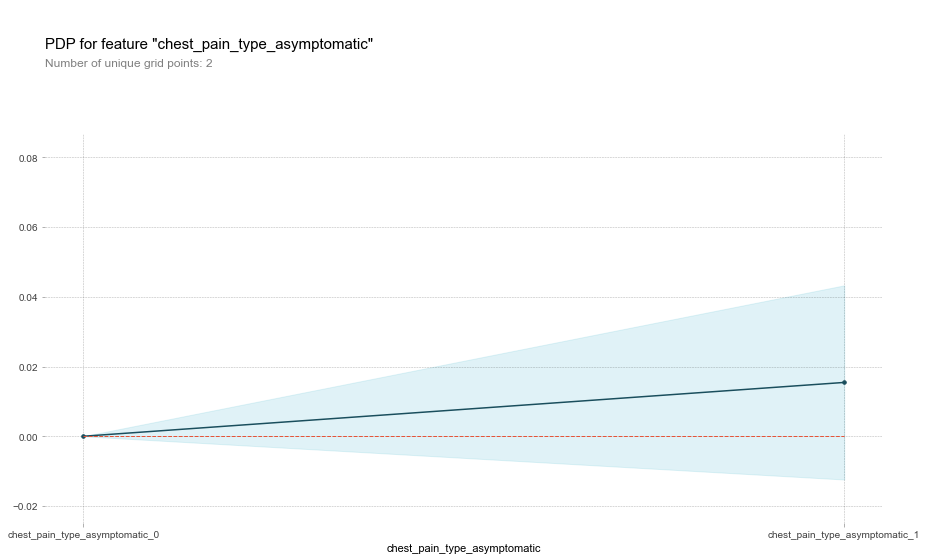

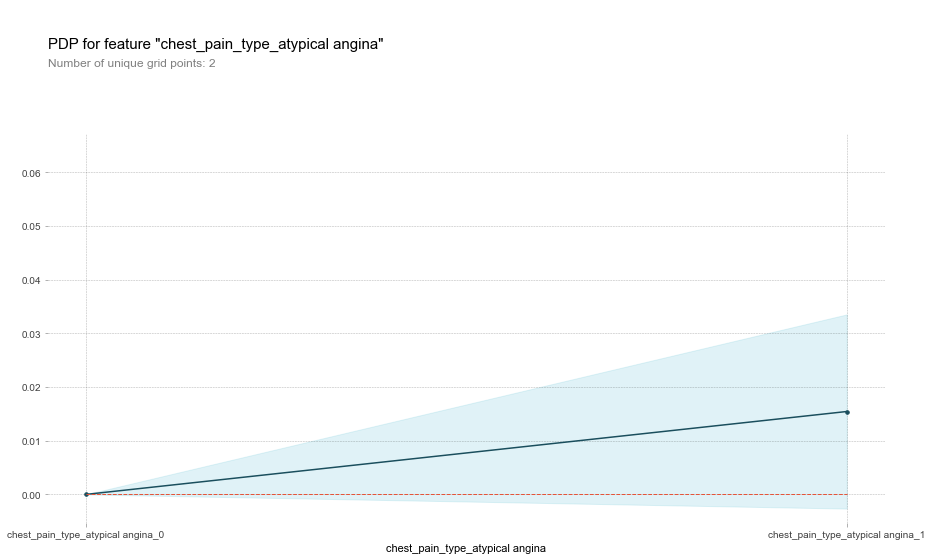

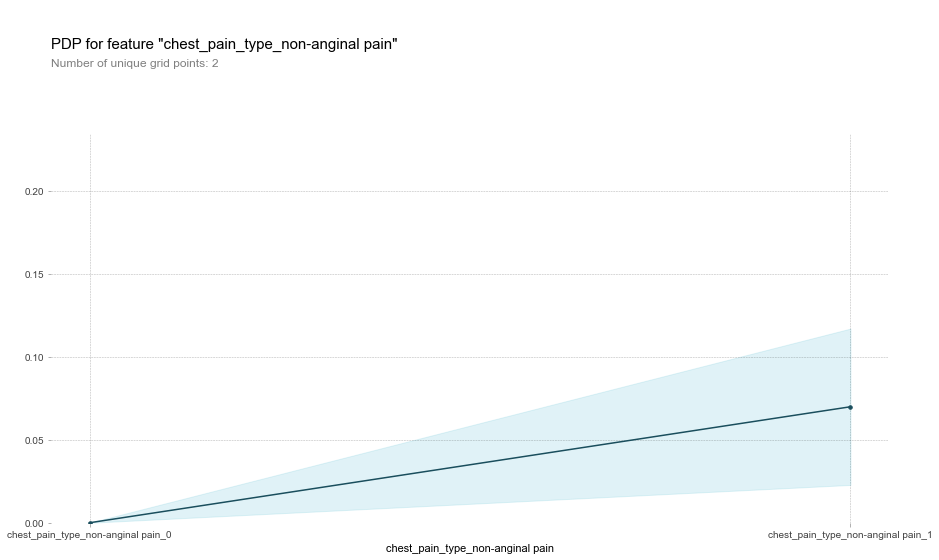

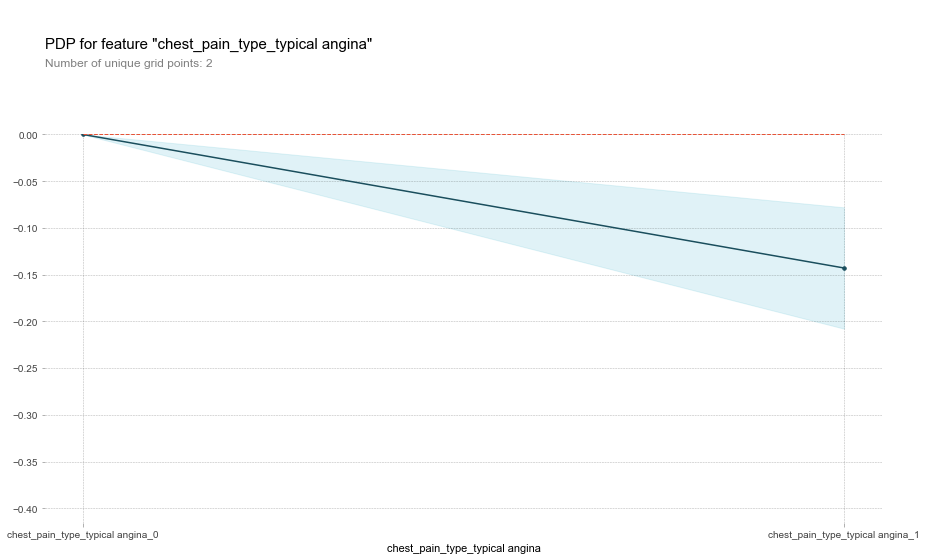

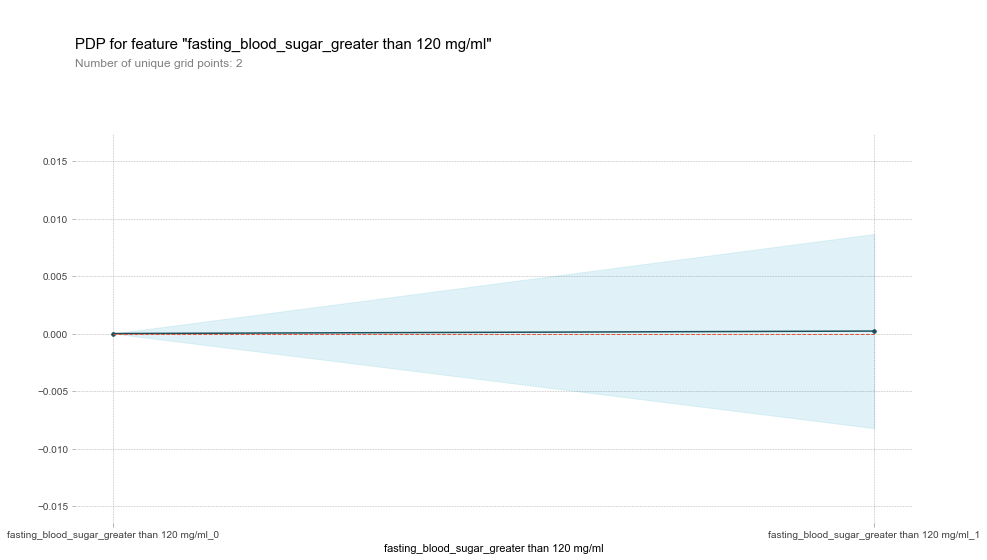

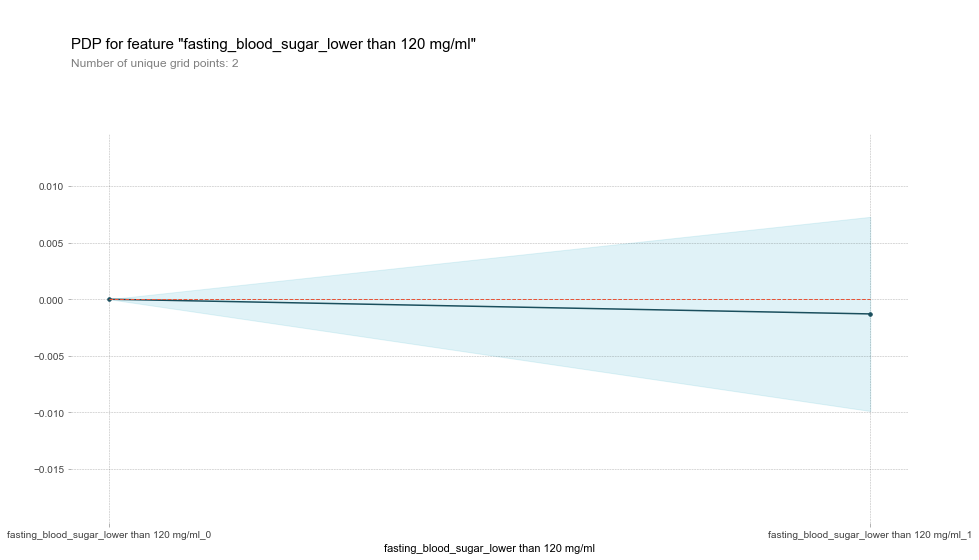

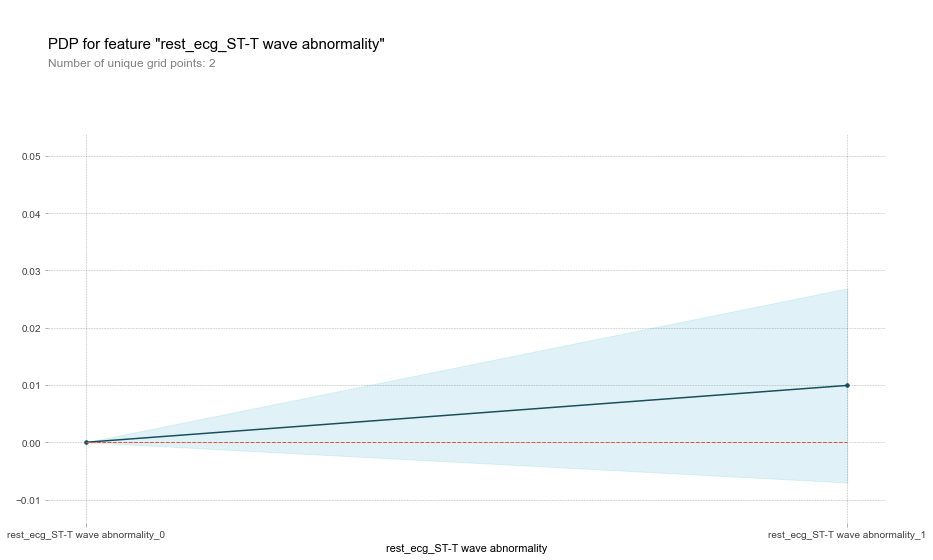

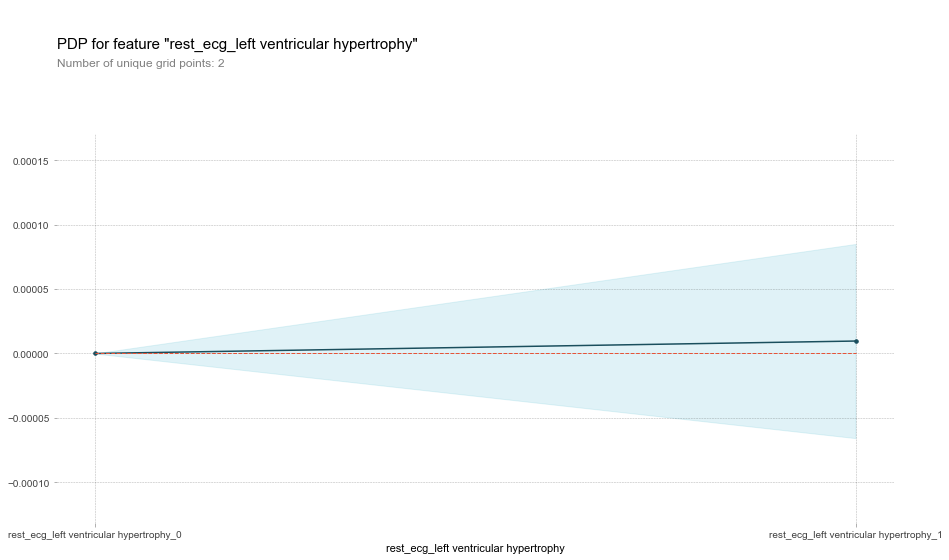

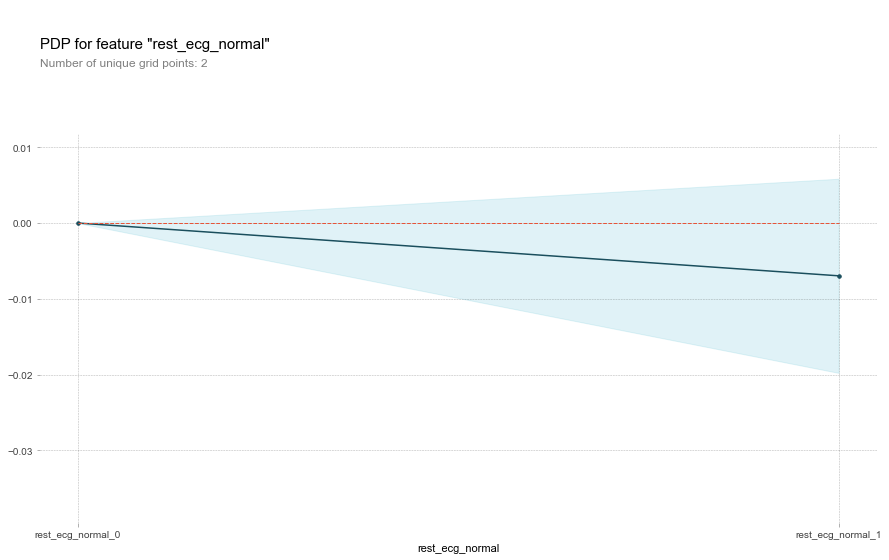

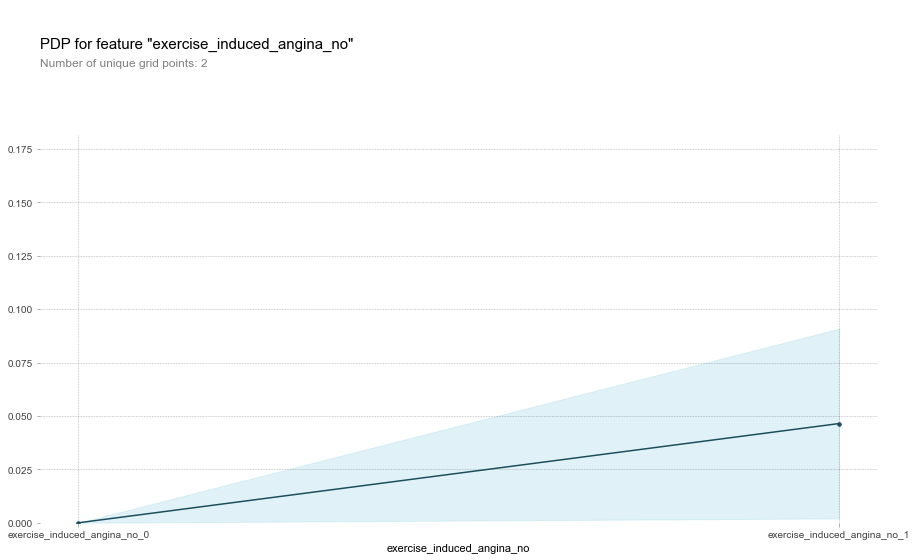

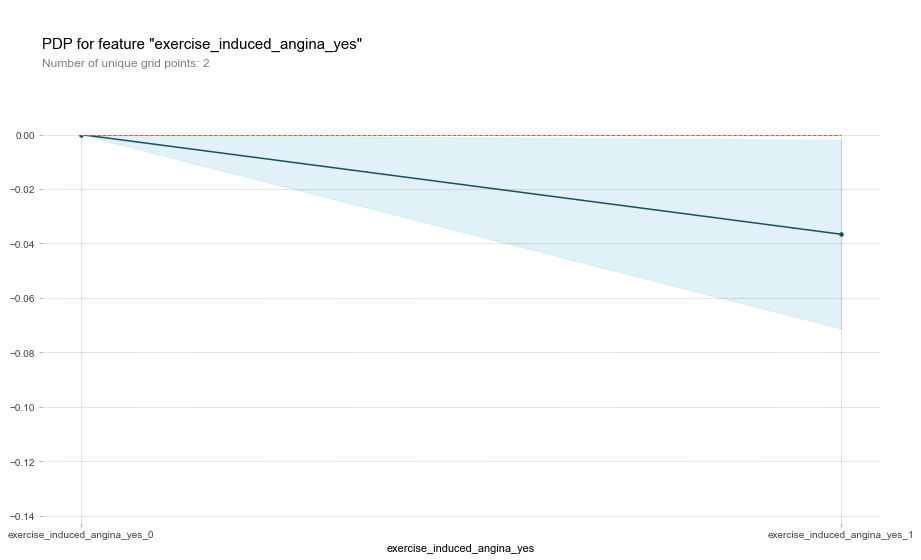

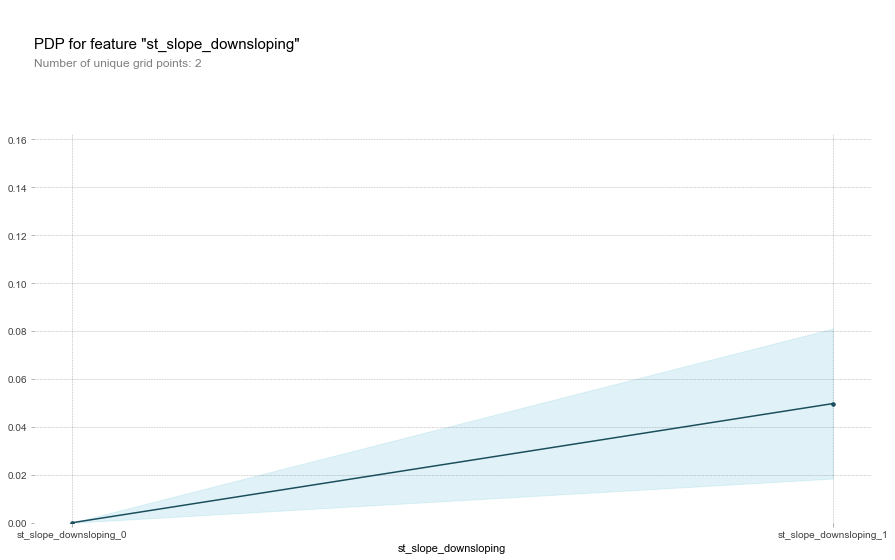

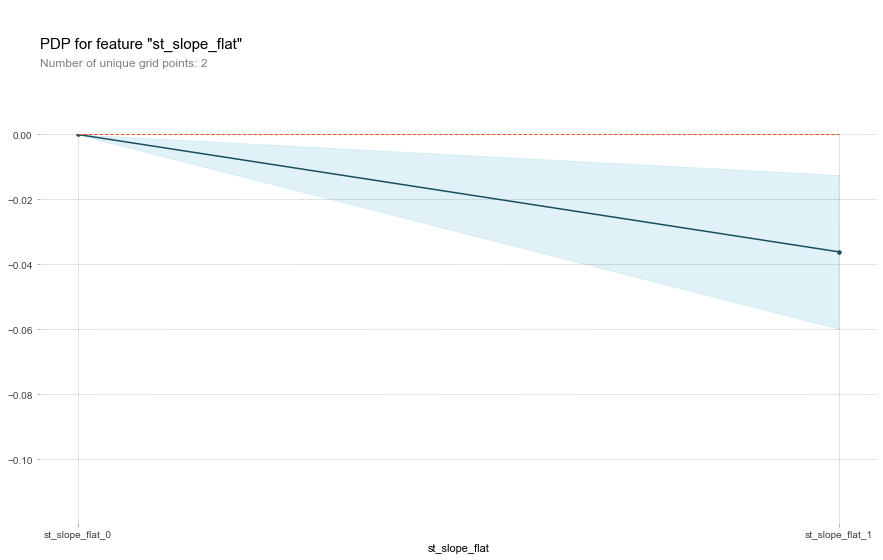

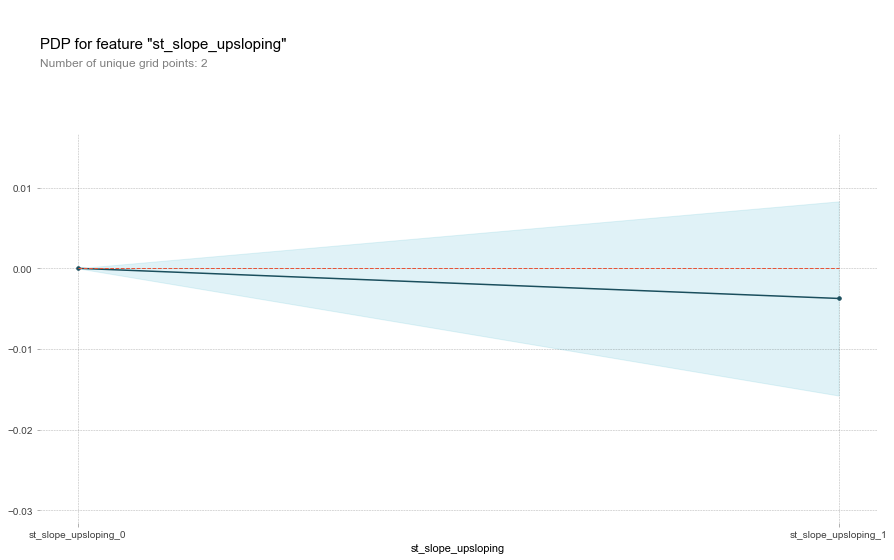

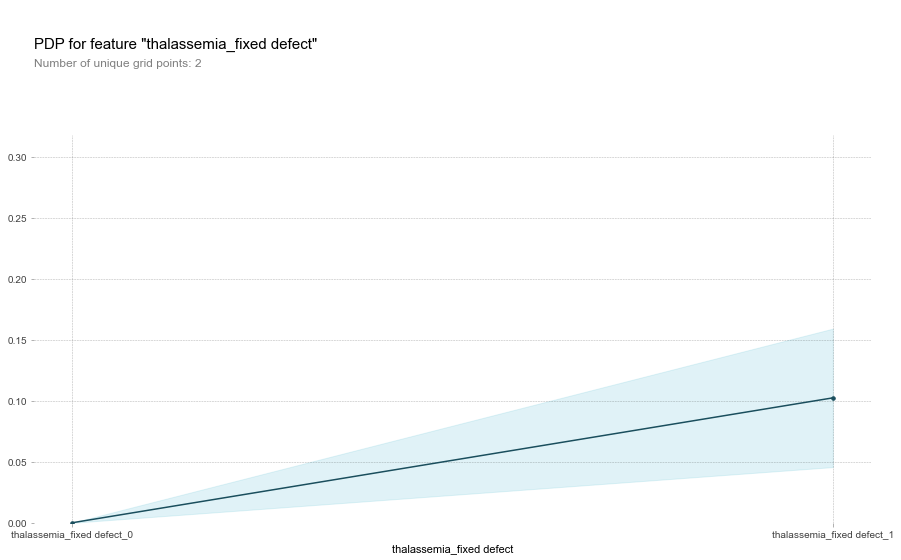

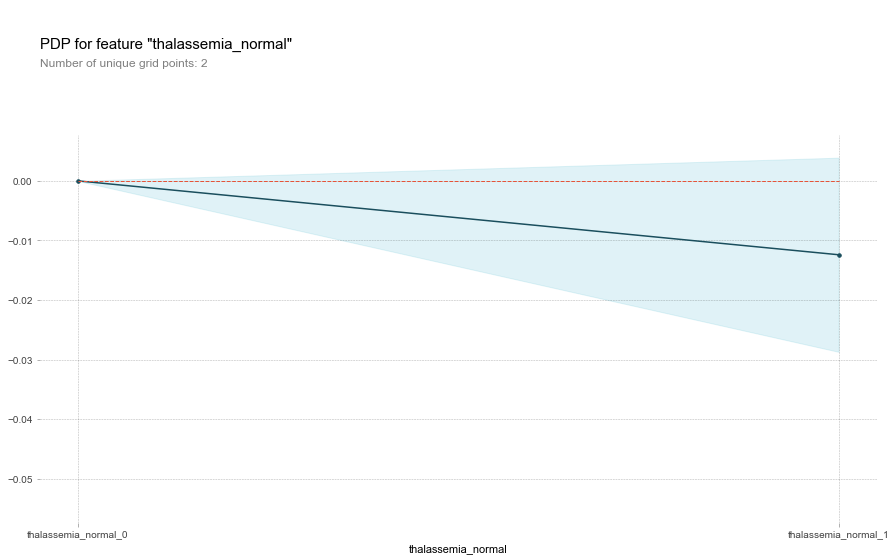

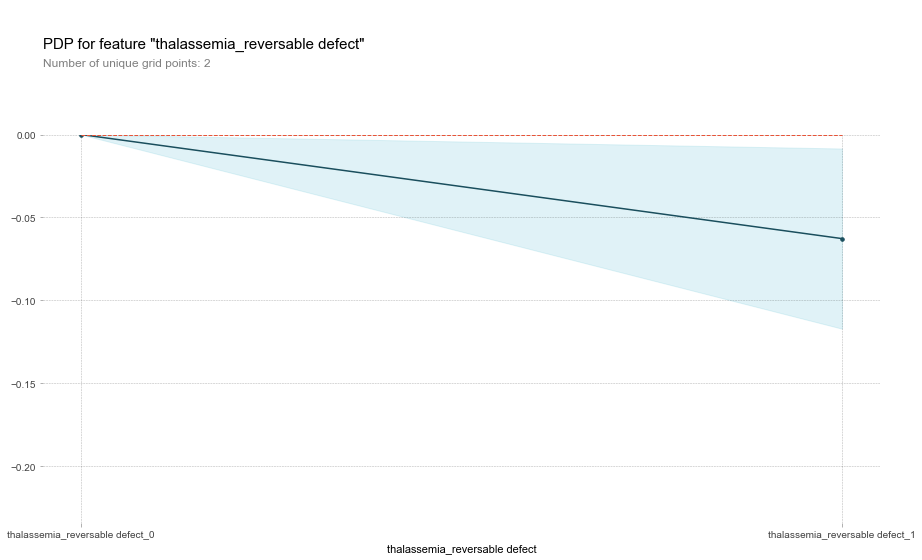

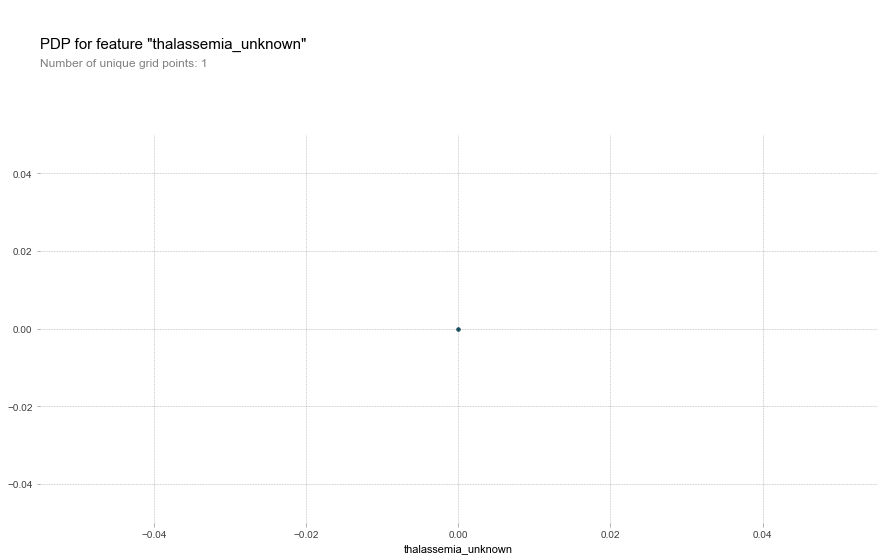

In [31]:
for feature_name in base_feature_names:
    pdp_dist = pdp.pdp_isolate(
        model=model, dataset=X_test, model_features=base_feature_names, feature=feature_name
    )
    fig, axes = pdp.pdp_plot(pdp_dist, feature_name)
    plt.show()

## 二维PDP图：特征之间交互关系分析
### 最大心率与心脏周围血管数量

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

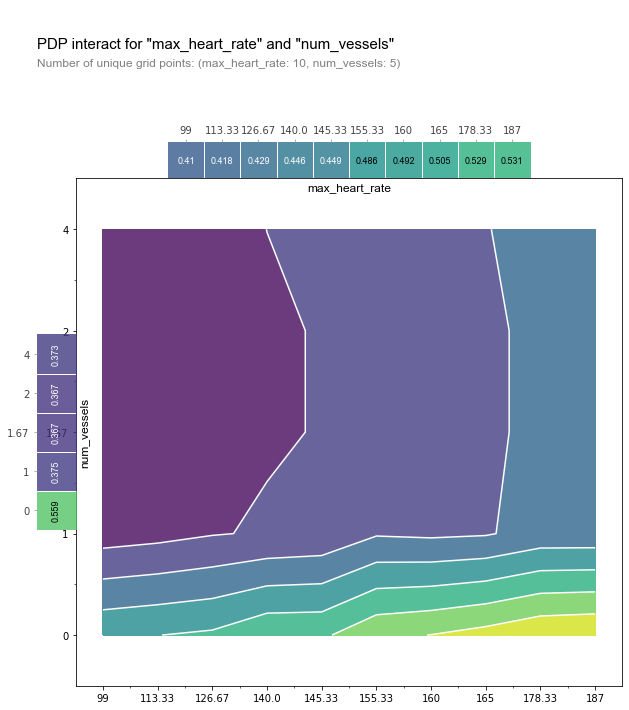

In [32]:
feature_names = ["max_heart_rate_achieved", "num_major_vessels"]
nick_names = ["max_heart_rate", "num_vessels"]

inter1 = pdp.pdp_interact(
    model=model, dataset=X_test, model_features=base_feature_names, features=feature_names
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=nick_names, plot_type="contour", x_quantile=True, plot_pdp=True
)

In [ ]:
fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter1, feature_names=nick_names, plot_type="grid", x_quantile=True, plot_pdp=True
)

### st_slope_flat与st_depression

In [ ]:
feature_names = ["st_slope_flat", "st_depression"]
nick_names = ["st_slope_flat", "st_depression"]

inter2 = pdp.pdp_interact(
    model=model, dataset=X_test, model_features=base_feature_names, features=feature_names
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter2, feature_names=nick_names, plot_type="contour", x_quantile=True, plot_pdp=True
)
plt.show()

### 最大心率与静息血压

In [ ]:
feature_names = ["max_heart_rate_achieved", "resting_blood_pressure"]
nick_names = ["max_heart_rate", "resting_blood_pressure"]

inter3 = pdp.pdp_interact(
    model=model, dataset=X_test, model_features=base_feature_names, features=feature_names
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=inter3, feature_names=nick_names, plot_type="contour", x_quantile=True, plot_pdp=True
)
plt.show()